## 1- Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2- Loading Image

In [2]:
img=cv2.imread('faces.jpg')

img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

## 3- Preparation of Color spaces

### 1- RGB

In [3]:
lower_rgb = np.array([0, 50, 70], dtype=np.uint8)
upper_rgb = np.array([255, 255, 255], dtype=np.uint8)
mask_rgb = cv2.inRange(img, lower_rgb, upper_rgb)

### 2- HSV

In [4]:
lower_hsv = np.array([0, 25, 60], dtype=np.uint8)
upper_hsv = np.array([30,185, 255], dtype=np.uint8)
mask_hsv = cv2.inRange(img_HSV, lower_hsv, upper_hsv)

### 3- YCrCb

In [5]:
lower_ycrcb = np.array([75, 125, 90], dtype=np.uint8)
upper_ycrcb = np.array([255, 180, 110], dtype=np.uint8)
mask_ycrcb = cv2.inRange(img_YCrCb, lower_ycrcb, upper_ycrcb)

## 4- Finall

Text(0.5, 1.0, 'YCrCb')

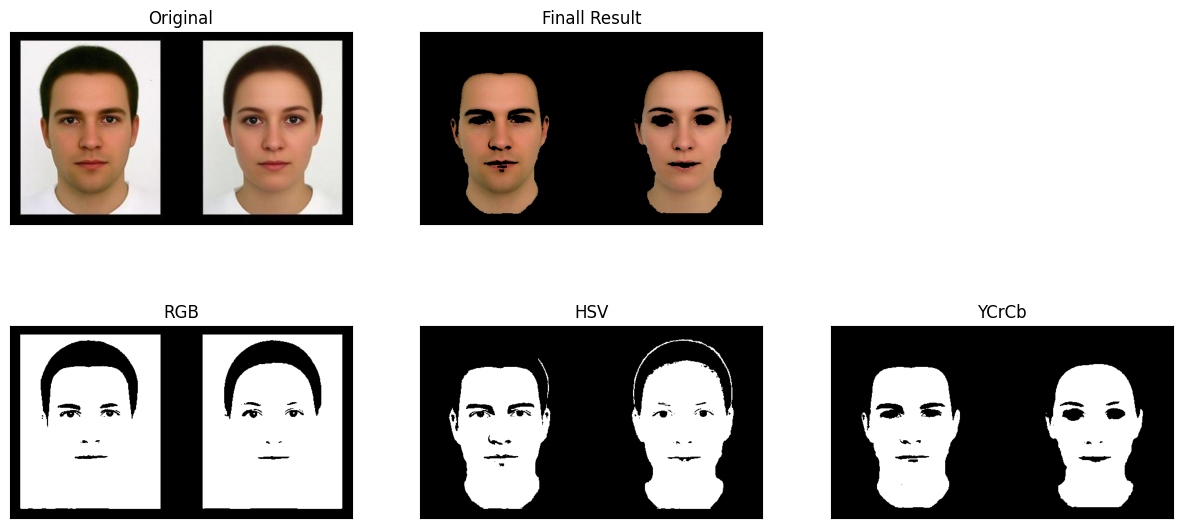

In [6]:
final_mask = cv2.bitwise_and(mask_rgb, mask_hsv)
final_mask = cv2.bitwise_and(final_mask, mask_ycrcb)

skin = cv2.bitwise_and(img, img, mask=final_mask)


plt.figure(figsize=[15,7])
plt.subplot(231);plt.imshow(img[...,::-1]);plt.xticks([]);plt.yticks([]);plt.title("Original")
plt.subplot(232);plt.imshow(skin[...,::-1]);plt.xticks([]);plt.yticks([]);plt.title("Finall Result")

plt.subplot(234);plt.imshow(mask_rgb,cmap='gray');plt.xticks([]);plt.yticks([]);plt.title("RGB")
plt.subplot(235);plt.imshow(mask_hsv, cmap='gray');plt.xticks([]);plt.yticks([]);plt.title("HSV")
plt.subplot(236);plt.imshow(mask_ycrcb, cmap='gray');plt.xticks([]);plt.yticks([]);plt.title("YCrCb")